In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Vanishing/Exploding Gradients
A = np.random.randn(5,5)
N = 20
for _ in range(N):
    A = A @ A

print(A)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


C:\Users\ccurtis\AppData\Local\Temp\ipykernel_11576\595589887.py:5: RuntimeWarning: overflow encountered in matmul
  A = A @ A
C:\Users\ccurtis\AppData\Local\Temp\ipykernel_11576\595589887.py:5: RuntimeWarning: invalid value encountered in matmul
  A = A @ A


In [15]:
import tensorflow as tf

# create a simple model
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(
        10, kernel_initializer="he_uniform", activation="relu", input_shape=(10,)
    )
)

# way too many fully connected layers
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(
            10, kernel_initializer="he_uniform", activation="relu"
        )
    )

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Dummy dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# train the model
history = model.fit(X, y, epochs=100, batch_size=10, validation_split=0.2)

ValueError: Unknown initializer: 'standard_normal'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

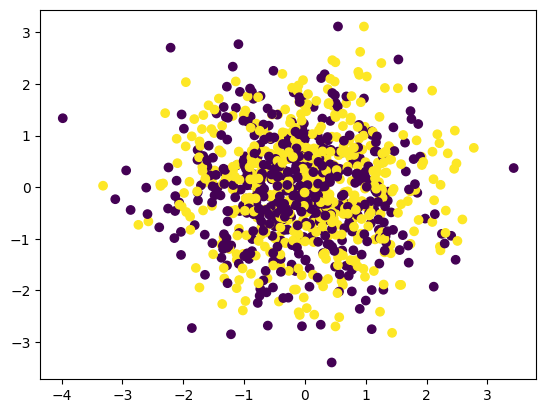

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)

Text(0, 0.5, 'Mean of weights')

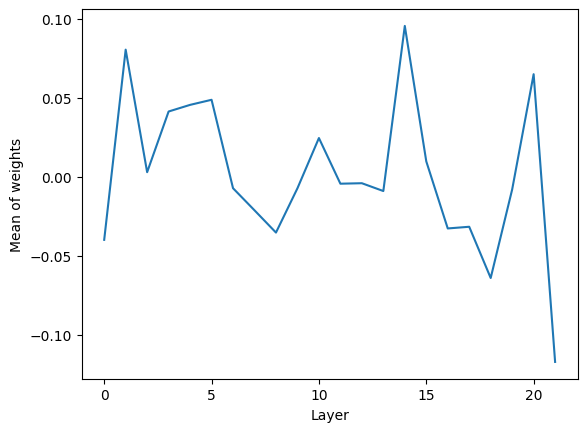

In [14]:
# plot the mean value of the weights
mean_weights = []
for layer in model.layers:
    mean_weights.append(np.mean(layer.get_weights()[0]))

plt.plot(mean_weights)
plt.xlabel('Layer')
plt.ylabel('Mean of weights')

In [19]:
# create a simple model
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(
        10, kernel_initializer="he_uniform", activation="relu", input_shape=(10,)
    )
)

# way too many fully connected layers
for _ in range(3):
    model.add(
        tf.keras.layers.Dense(
            10, kernel_initializer="he_uniform", activation="relu"
        )
    )
    model.add(
        tf.keras.layers.BatchNormalization()
    )

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                110       
                                                                 
 dense_73 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_3 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_74 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_4 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_75 (Dense)            (None, 10)               